# Data Preprocessing

In [3]:
import pandas as pd 
import numpy as np  

df = pd.read_csv('amazonDataTop100PerDepartment.csv')

df.info

df.describe

C:\Users\jonat\AppData\Local\Temp\ipykernel_67860\4204382736.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


<bound method NDFrame.describe of       Unnamed: 0                                        product url ranking  \
0              0  https://www.amazon.com/Amazon-Basics-Leak-proo...      #1   
1              1  https://www.amazon.com/Purina-Fancy-Feast-Deli...      #2   
2              2  https://www.amazon.com/Earth-Rated-Lavender-Sc...      #3   
3              3  https://www.amazon.com/Dr-Elseys-Precious-Ultr...      #4   
4              4  https://www.amazon.com/Purina-Friskies-Poultry...      #5   
...          ...                                                ...     ...   
2167          95  https://www.amazon.com/FYY-Hangers-Scratches-O...     #46   
2168          96  https://www.amazon.com/Original-Strength-Duck-...     #47   
2169          97  https://www.amazon.com/Amazon-Basics-Smart-Lig...     #48   
2170          98  https://www.amazon.com/Kleenex-Multifold-Paper...     #49   
2171          99  https://www.amazon.com/100-Sets-Plastic-Portio...     #50   

         brand   

In [17]:
# Printing columns
# Dropped first column and product URL
print(df.columns)


# Splitting the values in the "Department" column by comma and expanding them into separate rows
department_counts = df['Department'].str.split(',', expand=True).stack().value_counts()

# Printing the unique department values and their counts
print("Unique Departments and their counts:")
print(department_counts)

# Dropping missing values
# Drop rows with any missing values
df.dropna(inplace=True)

# Drop columns with any missing values
df.dropna(axis=1, inplace=True)



Index(['ranking', 'brand', 'product name', 'number of ratings', 'star rating',
       'price(in dollar)', 'color', 'Department'],
      dtype='object')
Unique Departments and their counts:
Pet Supplies                    100
Appliances                      100
Movies & TV                     100
Audible Books & Originals       100
Tools & Home Improvement        100
Unique Finds                    100
Musical Instruments             100
Amazon Renewed                  100
Patio                           100
Sports Collectibles             100
 Lawn & Garden                  100
Electronics                     100
Automotive                      100
Computers & Accessories         100
Industrial & Scientific         100
Camera & Photo Products         100
Clothing                         88
 Shoes & Jewelry                 88
Toys & Games                     76
Sports & Outdoors                60
Baby                             60
Office Supplies                  60
Amazon Devices & Ac

In [24]:
# Convert 'star rating' and 'number of ratings' columns to numeric, replacing non-numeric values with NaN
df['star rating'] = pd.to_numeric(df['star rating'], errors='coerce')
df['number of ratings'] = pd.to_numeric(df['number of ratings'], errors='coerce')

# Handle missing values (NaN) in 'star rating' and 'number of ratings' columns
df['star rating'].fillna(0, inplace=True)
df['number of ratings'].fillna(0, inplace=True)

# Rating-to-Review Ratio: Calculating the ratio of star rating to the number of ratings
# Handle division by zero
df['rating to review ratio'] = df['star rating'] / df['number of ratings'].replace(0, np.nan)


C:\Users\jonat\AppData\Local\Temp\ipykernel_54348\1993231740.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['star rating'].fillna(0, inplace=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_54348\1993231740.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

In [6]:
unique_departments = df['Department'].unique()
print(unique_departments)

# Group the DataFrame by department and create separate DataFrames
department_dfs = {department: df[df['Department'] == department] for department in df['Department'].unique()}

# Display the DataFrames for each department
for department, department_df in department_dfs.items():
    print(f"Department: {department}")
    print(department_df)
    print()

['Pet Supplies' 'Sports & Outdoors' 'Office Supplies' 'Kitchen & Dining'
 'Books' 'Baby' 'Computers & Accessories' 'Beauty & Personal Care'
 'Automotive' 'Camera & Photo Products' 'Electronics' 'Appliances'
 'Amazon Devices & Accessories' 'Sports Collectibles'
 'Patio, Lawn & Garden' 'Arts, Crafts & Sewing' 'Amazon Renewed'
 'Clothing, Shoes & Jewelry' 'Entertainment Collectibles' 'Toys & Games'
 'Health & Household' 'Musical Instruments' 'Cellphones & Accessories'
 'Unique Finds' 'Tools & Home Improvement' 'Audible Books & Originals'
 'Movies & TV' 'Industrial & Scientific']
Department: Pet Supplies
    Unnamed: 0                                        product url ranking  \
0            0  https://www.amazon.com/Amazon-Basics-Leak-proo...      #1   
1            1  https://www.amazon.com/Purina-Fancy-Feast-Deli...      #2   
2            2  https://www.amazon.com/Earth-Rated-Lavender-Sc...      #3   
3            3  https://www.amazon.com/Dr-Elseys-Precious-Ultr...      #4   
4      

# EDA

In [25]:
# Categorize products based on their average rating.
def rating_level(rating):
    if rating >= 4.5:
        return 'High'
    elif rating >= 3.5:
        return 'Medium'
    else:
        return 'Low'

df['rating level'] = df['star rating'].astype(float).apply(rating_level)

# Convert 'price(in dollar)' column to numeric, replacing non-numeric values with NaN
df['price(in dollar)'] = pd.to_numeric(df['price(in dollar)'], errors='coerce')

# Categorize products based on their price
def price_range(price):
    if pd.isna(price):
        return 'Unknown'  # Handle NaN values
    elif price >= 100:
        return 'Expensive'
    elif price >= 50:
        return 'Moderate'
    else:
        return 'Affordable'

df['price range'] = df['price(in dollar)'].apply(price_range)


# Brand Popularity: Count the number of products for each brand.
brand_counts = df['brand'].value_counts()
df['brand popularity'] = df['brand'].map(brand_counts)

# Rating-to-Review Ratio: Calculating the ratio of star rating to the number of ratings.
df['rating to review ratio'] = df['star rating'].astype(float) / df['number of ratings'].astype(float)


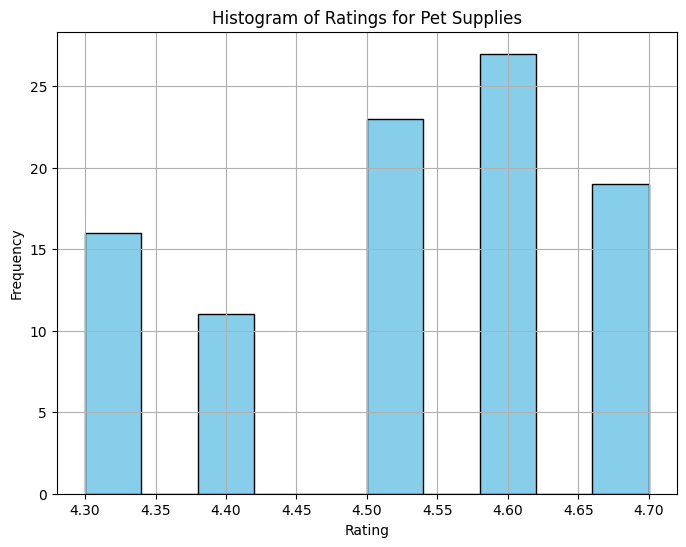

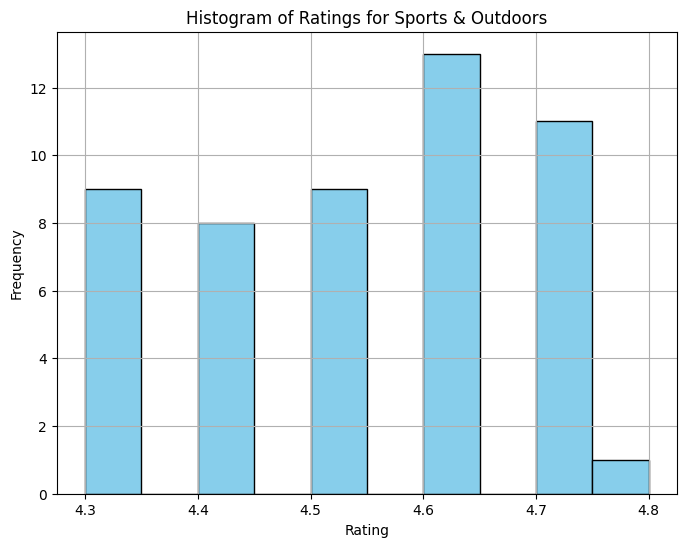

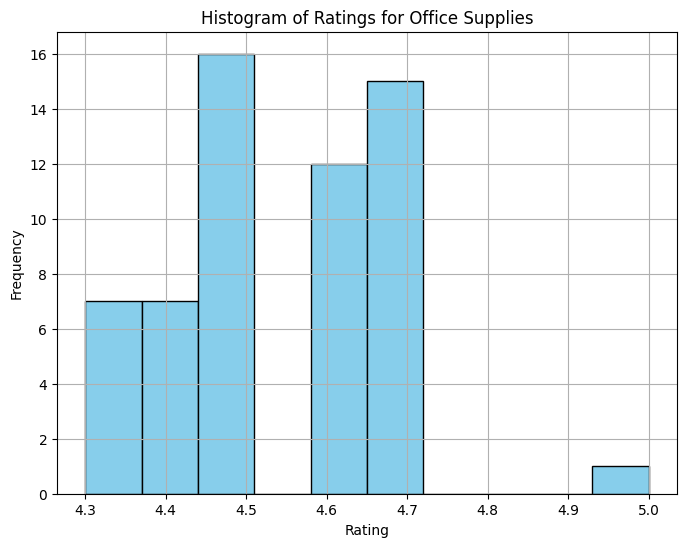

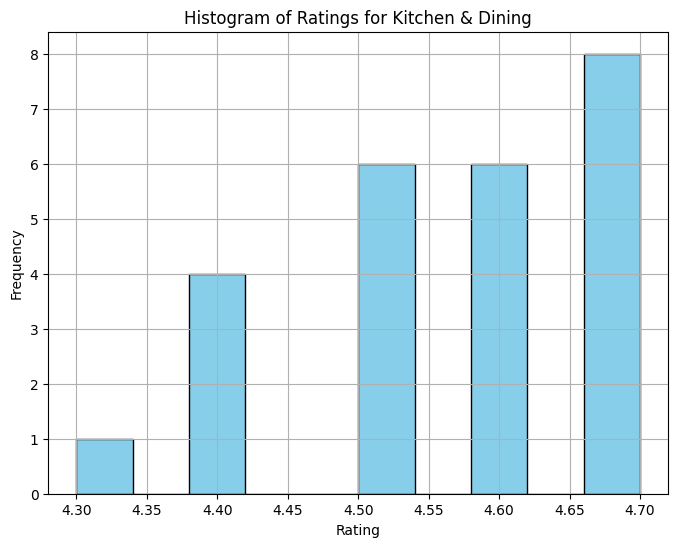

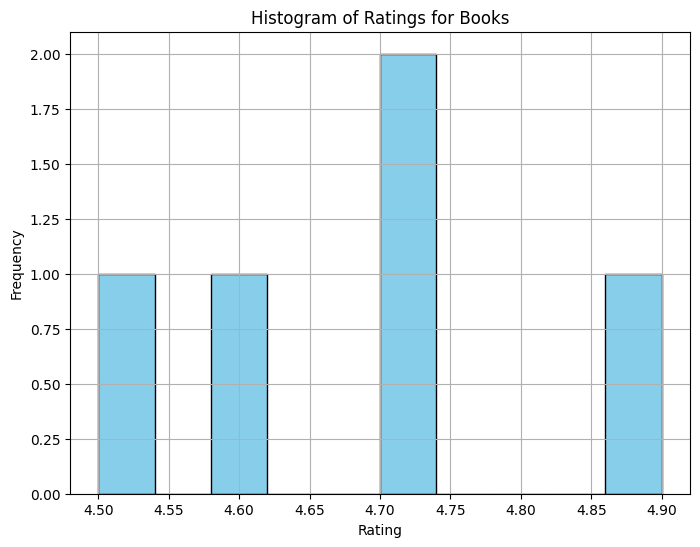

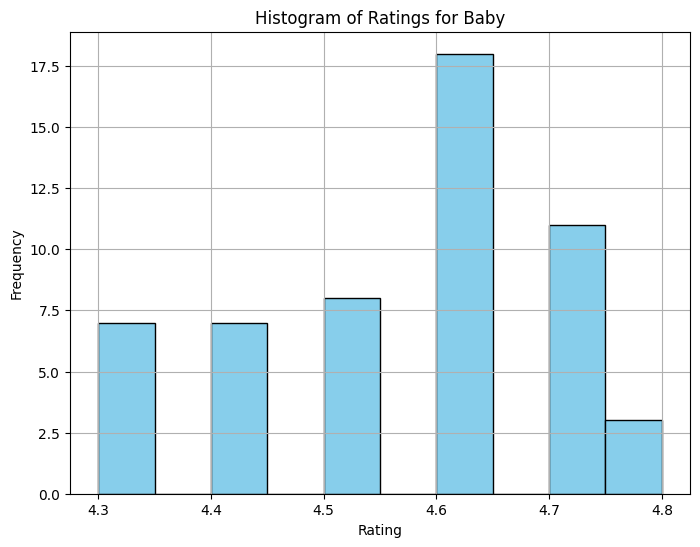

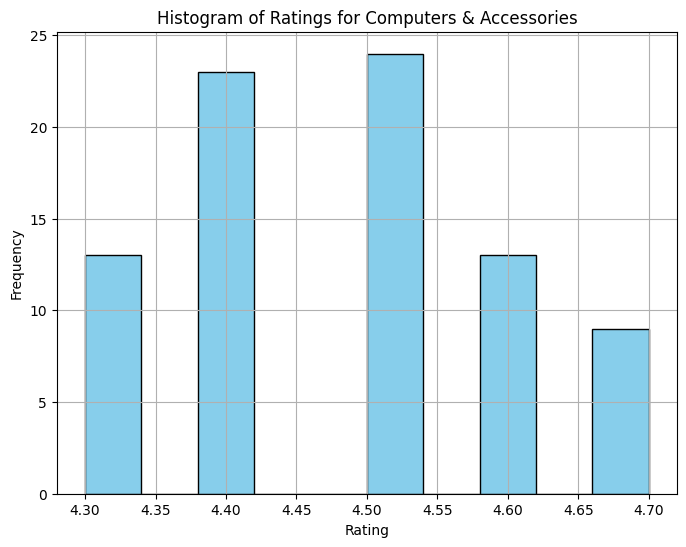

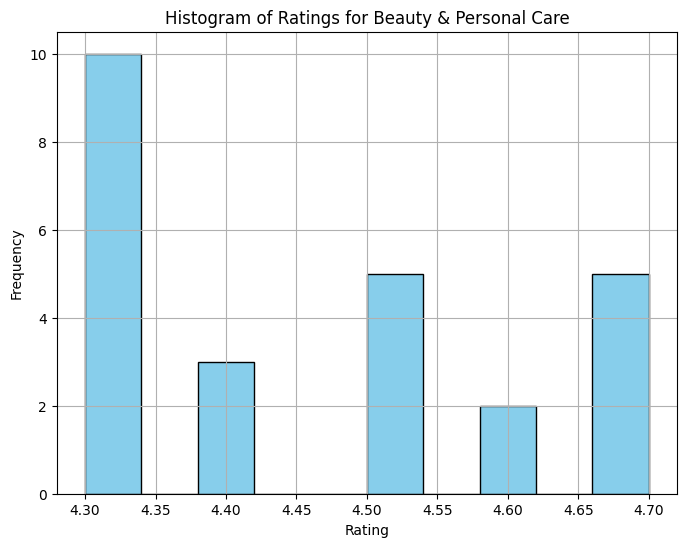

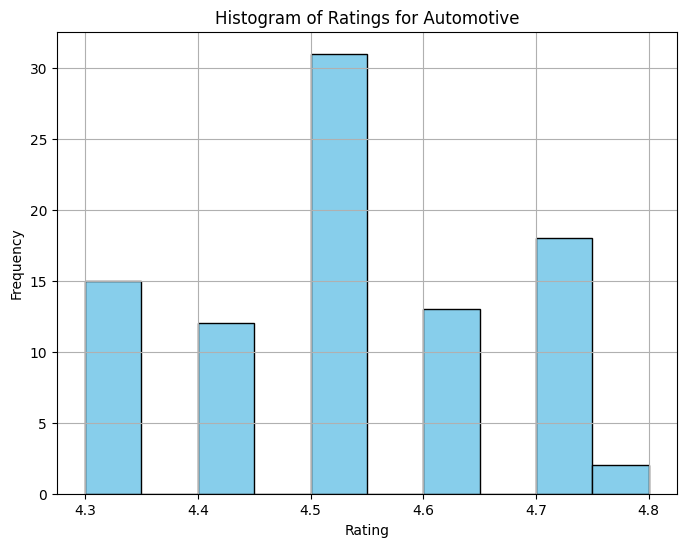

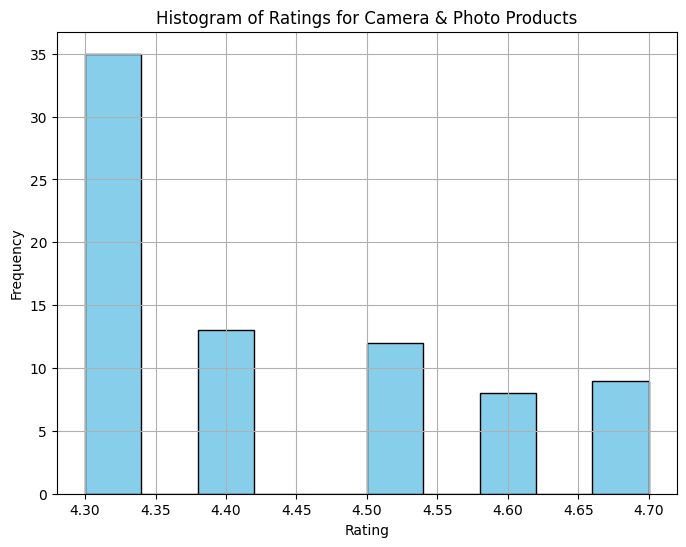

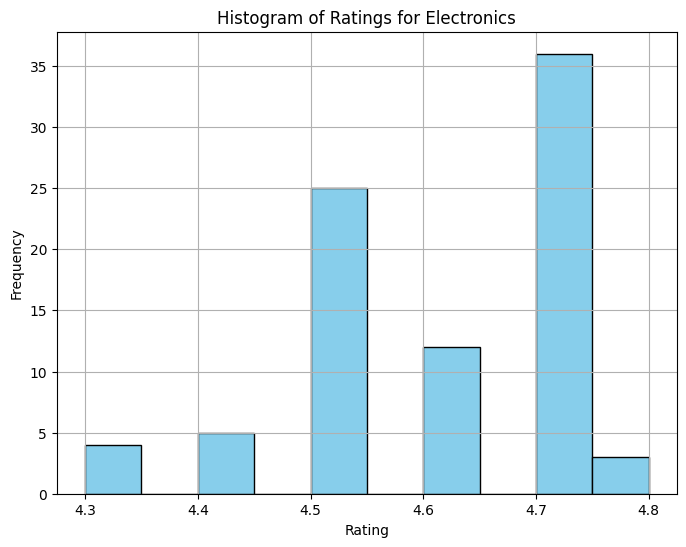

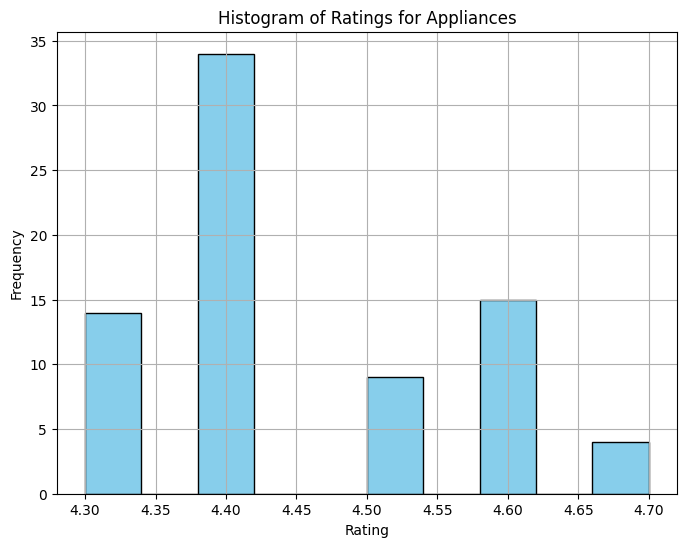

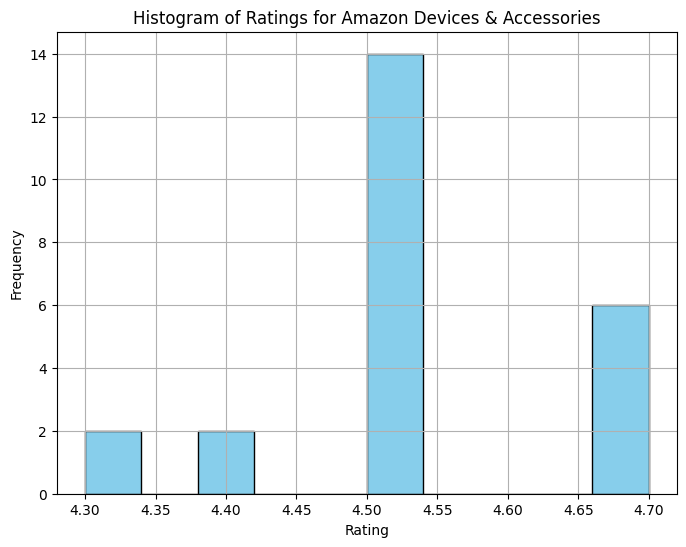

C:\Users\jonat\AppData\Roaming\Python\Python311\site-packages\matplotlib\axes\_axes.py:6826: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
C:\Users\jonat\AppData\Roaming\Python\Python311\site-packages\matplotlib\axes\_axes.py:6827: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


ValueError: autodetected range of [nan, nan] is not finite

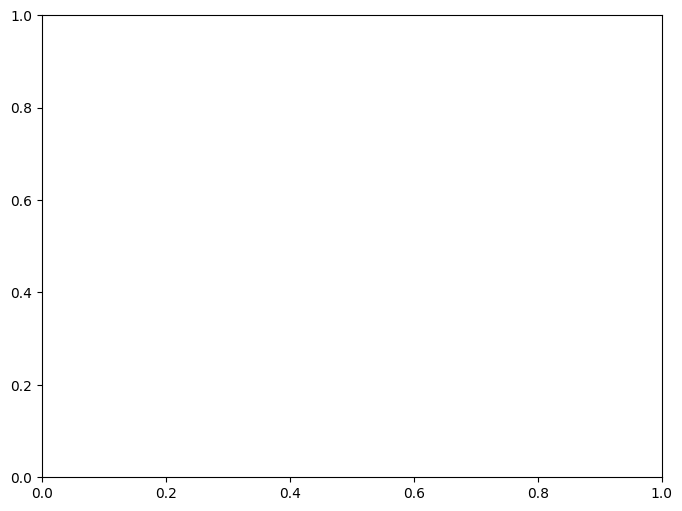

In [7]:
import matplotlib.pyplot as plt

# Group the DataFrame by department and create separate DataFrames
department_dfs = {department: df[df['Department'] == department] for department in df['Department'].unique()}

# Plot histograms of ratings for each department
for department, department_df in department_dfs.items():
    plt.figure(figsize=(8, 6))
    plt.hist(department_df['star rating'], bins=10, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of Ratings for {department}')
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()



# Statistical Analysis

In [19]:
# Check for missing values in X and y
print(X.isnull().sum())
print(y.isnull().sum())

# Check the data types of X and y
print(X.dtypes)
print(y.dtypes)


const                0
number of ratings    0
star rating          0
price(in dollar)     0
dtype: int64
0
const                float64
number of ratings    float64
star rating          float64
price(in dollar)     float64
dtype: object
float64


In [22]:
# Check for missing or NaN values in the columns
missing_values = df[['number of ratings', 'star rating', 'price(in dollar)']].isnull().sum()
print("Missing values in each column:")
print(missing_values)

# Drop rows with missing values in any of the numeric columns
df.dropna(subset=['number of ratings', 'star rating', 'price(in dollar)'], inplace=True)

# Verify the shape of the DataFrame after dropping missing values
print("\nShape of DataFrame after dropping missing values:")
print(df.shape)


Missing values in each column:
number of ratings    0
star rating          0
price(in dollar)     0
dtype: int64

Shape of DataFrame after dropping missing values:
(0, 10)


In [24]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv("amazonDataTop100PerDepartment.csv")

# Display the first few rows of the DataFrame
print(df.head())


   Unnamed: 0                                        product url ranking  \
0           0  https://www.amazon.com/Amazon-Basics-Leak-proo...      #1   
1           1  https://www.amazon.com/Purina-Fancy-Feast-Deli...      #2   
2           2  https://www.amazon.com/Earth-Rated-Lavender-Sc...      #3   
3           3  https://www.amazon.com/Dr-Elseys-Precious-Ultr...      #4   
4           4  https://www.amazon.com/Purina-Friskies-Poultry...      #5   

      brand                                       product name  \
0    Basics  Amazon Basics Dog and Puppy Pee Pads with Leak...   
1     Feast  Purina Fancy Feast Delights with Cheddar Grill...   
2     Rated  Earth Rated Dog Poop Bags - Leak-Proof and Ext...   
3   Elsey's  Dr. Elsey's Precious Cat Ultra Cat Litter, 18 ...   
4  Friskies  Purina Friskies Gravy Wet Cat Food , Poultry S...   

  number of ratings  star rating price(in dollar)                color  \
0           250,328          4.5            20.83         Blue & White  

In [1]:
import pandas as pd
import statsmodels.api as sm

# Load the CSV file into a DataFrame
df = pd.read_csv("amazonDataTop100PerDepartment1.csv")

# Convert non-numeric columns to numeric
df['number of ratings'] = pd.to_numeric(df['number of ratings'], errors='coerce')
df['star rating'] = pd.to_numeric(df['star rating'], errors='coerce')
df['price(in dollar)'] = pd.to_numeric(df['price(in dollar)'], errors='coerce')

# Drop rows with missing values in any of the numeric columns
df.dropna(subset=['number of ratings', 'star rating', 'price(in dollar)'], inplace=True)

# Define the independent variables (features) and dependent variable (target)
X = df[['number of ratings', 'star rating']]
y = df['price(in dollar)']

# Add constant to X
X = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())


C:\Users\jonat\AppData\Local\Temp\ipykernel_46328\3902017927.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


                            OLS Regression Results                            
Dep. Variable:       price(in dollar)   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     1.381
Date:                Wed, 21 Feb 2024   Prob (F-statistic):              0.258
Time:                        15:19:47   Log-Likelihood:                -467.08
No. Observations:                  74   AIC:                             940.2
Df Residuals:                      71   BIC:                             947.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -137.4750    426.34

# Web Scrapping

In [ ]:
# Importing libraries
import time
import random
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
pd.options.mode.chained_assignment = None
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.keys import Keys
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

# Function to delay some process
def delay():
    time.sleep(random.randint(3, 10))

# Scrolling down the page in order to overcome Lazy Loading
def lazy_loading():
    element = driver.find_element(By.TAG_NAME, 'body')
    count = 0
    while count < 20:
        element.send_keys(Keys.PAGE_DOWN)
        delay()
        count += 1

# Function to fetch the product links of products
def fetch_product_links_and_ranks():
    try:
        # Wait for the product grid to be present
        WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, "p13n-desktop-grid")))
        
        # Once the product grid is present, proceed with extracting product links and rankings
        content = driver.page_source
        homepage_soup = BeautifulSoup(content, 'html.parser')
    
        all_products = homepage_soup.find('div', attrs={"class": "p13n-desktop-grid"})
        
        if all_products is not None:
            for product_section in all_products.find_all('div', {'id': 'gridItemRoot'}):
                for product_link in product_section.find_all('a',{'tabindex':'-1'}):
                    if product_link['href'].startswith('https:'):
                        product_links.append(product_link['href'])
                    else:
                        product_links.append('https://www.amazon.com' + product_link['href'])
                ranking.append(product_section.find('span',{'class': 'zg-bdg-text'}).text)
        else:
            print("No products found on the page.")
    except Exception as e:
        print("An error occurred while fetching product links and ranks:", str(e))

# Function to extract content of the page
def extract_content(url):
    driver.get(url)
    page_content = driver.page_source
    product_soup = BeautifulSoup(page_content, 'html.parser')
    return product_soup

# Function to extract product name
def extract_product_name(soup):
    try:
        name_of_product = soup.find('div', attrs={"id": "titleSection"}).text.strip()
        data['product name'].iloc[product] = name_of_product

    except:
        name_of_product = 'Product name not available '
        data['product name'].iloc[product] = name_of_product

# Function to extract brand name
def extract_brand(soup):
    try:
        brand = soup.find('a', attrs={"id": "bylineInfo"}).text.split(':')[1].strip()  #one location where brand data could be found
        data['brand'].iloc[product] = brand

    except:
        if soup.find_all('tr', attrs={'class': 'a-spacing-small po-brand'}):  #other location where brand data could be found
            brand = soup.find_all('tr', attrs={'class': 'a-spacing-small po-brand'})[0].text.strip().split(' ')[-1]
            data['brand'].iloc[product] = brand
        else:
            brand = 'Brand data not available'
            data['brand'].iloc[product] = brand

def extract_price(soup):
    try:
        # Find the element containing the price
        price_element = soup.find('span', class_='a-offscreen')

        # Extract the price text from the element
        price_text = price_element.text.strip()

        # Extract the price value
        price = price_text.split('$')[-1]

        # Update the 'price(in dollar)' column in the DataFrame
        data['price(in dollar)'].iloc[product] = price
    except Exception as e:
        # If an error occurs, set the price to 'Price data not available'
        price = 'Price data not available'
        data['price(in dollar)'].iloc[product] = price
        print("Error while extracting price:", e)



# Function to extract size
def extract_size(soup):
    try:
        size = soup.find('span', attrs={"id": "inline-twister-expanded-dimension-text-size_name"}).text.strip()
        data['size'].iloc[product] = size

    except:
        size = 'Size data not available'
        data['size'].iloc[product] = size

# Function to extract star rating
def extract_star_rating(soup):
    try:
        star = None
        for star_rating_locations in ['a-icon a-icon-star a-star-4-5', 'a-icon a-icon-star a-star-5']:
            stars = soup.find_all('i', attrs={"class": star_rating_locations})
            for i in range(len(stars)):
                star = stars[i].text.split(' ')[0]
                if star:
                    break
            if star:
                break
        
    except:
        star = 'Star rating data not available'
        
    data['star rating'].iloc[product] = star   

# Function to extract number of ratings
def extract_num_of_ratings(soup):
    try:
        star = soup.find('span', attrs={"id": "acrCustomerReviewText"}).text.split(' ')[0]
        data['number of ratings'].iloc[product] = star

    except:
        star = 'Number of rating not available'
        data['number of ratings'].iloc[product] = star

# Function to extract color
def extract_color(soup):
    try:
        color = soup.find('tr', attrs={'class': 'a-spacing-small po-color'}).text.strip().split('  ')[1].strip()
        data['color'].iloc[product] = color

    except:
        color = 'Color not available'
        data['color'].iloc[product] = color


# Fetching the product links of all items
product_links = []
ranking=[]


for page in range(1, 3):  # Iterate over the 2 pages in which the products are divided
    fetch_product_links_and_ranks()  # To fetch the links to products
    # Update the URL to the desired Amazon Best Sellers category page for Handmade products
    start_url = 'https://www.amazon.com/Best-Sellers-Handmade-Products/zgbs/handmade/ref=zg_bs_nav_handmade_0'
    driver.get(start_url)
    time.sleep(10)
    lazy_loading()  # To overcome lazy loading
    fetch_product_links_and_ranks()  # To fetch the links to products

# Creating a dictionary of the required columns
data_dic = {'product url': [],'ranking': [], 'brand': [], 'product name': [],
            'number of ratings': [], 'size': [], 'star rating': [], 'price(in dollar)': [], 'color': []}


# Creating a data frame with those columns
data = pd.DataFrame(data_dic)


# Assigning the scraped links and rankings to the columns 'product url' and 'ranking'
data['product url'] = product_links
data['ranking'] = ranking

for product in range(len(data)):
    product_url = data['product url'].iloc[product]
    product_content = extract_content(product_url)

    # brands
    extract_brand(product_content)

    # product_name
    extract_product_name(product_content)

    # price
    extract_price(product_content)

    # size
    extract_size(product_content)

    # star rating
    extract_star_rating(product_content)

    # number of ratings
    extract_num_of_ratings(product_content)

    # color
    extract_color(product_content)


# saving the resultant data frame as a csv file
data.to_csv('amazon_best_sellers_handmade_products.csv')
